<a href="https://colab.research.google.com/github/sriya-singh/codealpha_tasks/blob/main/TitanicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lazypredict

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from lightgbm import LGBMClassifier
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

### Columns or Features Description


1.  **PassengerId**: A unique identifier assigned to each passenger.
2.  **Survived**: Indicates whether a passenger survived (1) or died (0).
3.  **Pclass**: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).
4.  **Name**: The name of the passenger.
5.  **Sex**: Represents the gender of the passenger, typically categorized as male or female.
6.  **Age**: The age of the passenger, often represented as a numerical value.
7.  **SibSp**: Indicates the number of siblings or spouses traveling with the passenger.
8.  **Parch**: Represents the number of parents or children traveling with the passenger.
9.  **Ticket**: The ticket number associated with the passenger's ticket.
10. **Fare**: The amount of money spent on the ticket.
11. **Cabin**: Represents the cabin category or number assigned to the passenger, if available.
12. **Embarked**: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton)

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df = df.drop(columns=['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df['Age'].mean()

29.69911764705882

In [ ]:
df['Age'].median()

28.0

In [ ]:
df['Age'].mode()

0   24.00
Name: Age, dtype: float64

In [ ]:
df['Age'].fillna(29, inplace=True)

In [ ]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [ ]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.00,891.00,891,891.00,891.00,891.00,891.00,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.38,2.31,NaN,29.56,0.52,0.38,32.20,NaN
std,0.49,0.84,NaN,13.01,1.10,0.81,49.69,NaN
min,0.00,1.00,NaN,0.42,0.00,0.00,0.00,NaN
25%,0.00,2.00,NaN,22.00,0.00,0.00,7.91,NaN
50%,0.00,3.00,NaN,29.00,0.00,0.00,14.45,NaN
75%,1.00,3.00,NaN,35.00,1.00,0.00,31.00,NaN


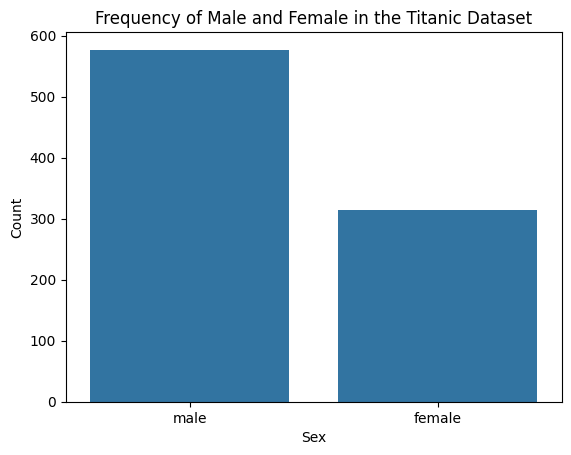

In [ ]:
sns.countplot(x='Sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Frequency of Male and Female in the Titanic Dataset')
plt.show()


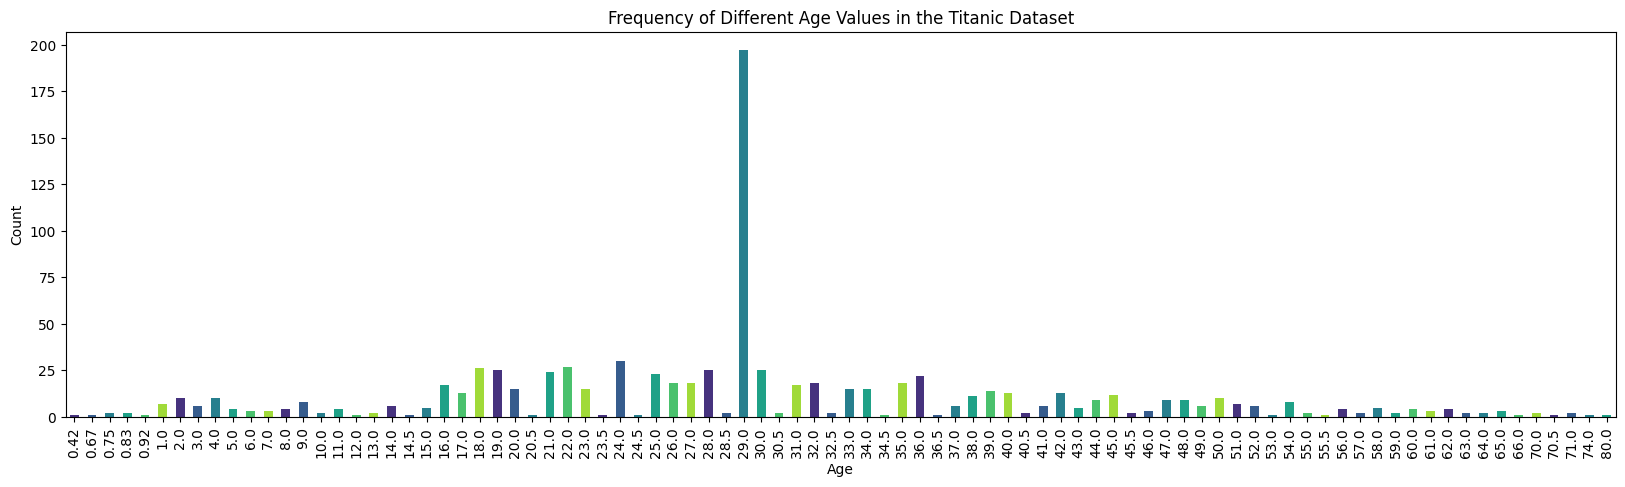

In [ ]:
plt.figure(figsize=(20,5))
df['Age'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette('viridis'))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency of Different Age Values in the Titanic Dataset')
plt.show()


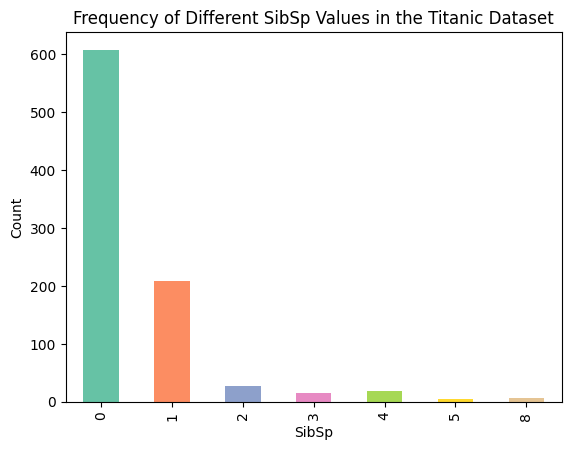

In [ ]:
df['SibSp'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette('Set2'))
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.title('Frequency of Different SibSp Values in the Titanic Dataset')
plt.show()


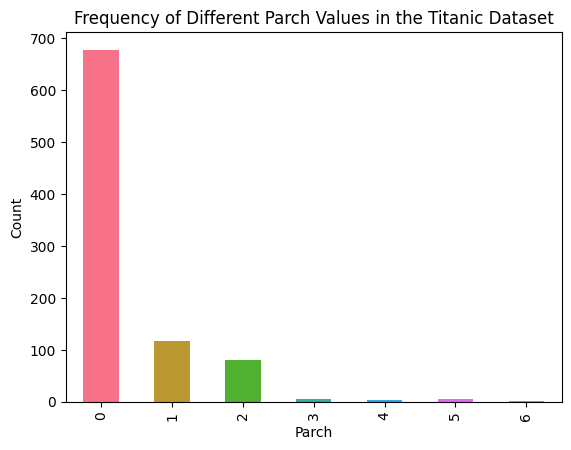

In [ ]:
df['Parch'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette('husl'))
plt.xlabel('Parch')
plt.ylabel('Count')
plt.title('Frequency of Different Parch Values in the Titanic Dataset')
plt.show()


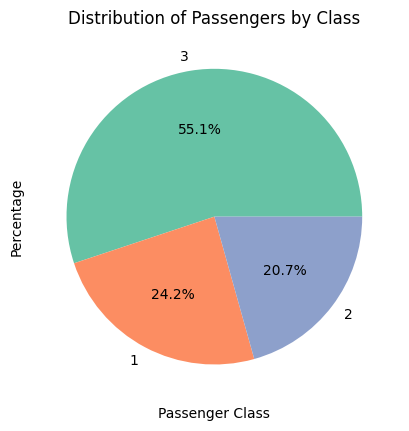

In [ ]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribution of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.show()


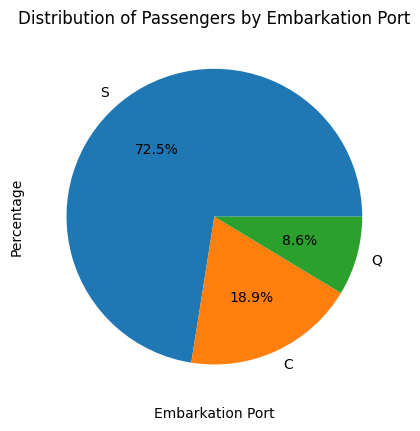

In [ ]:
df['Embarked'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('tab10'))
plt.title('Distribution of Passengers by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Percentage')
plt.show()


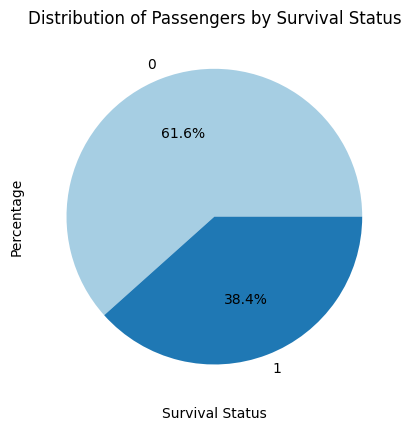

In [ ]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Paired'))
plt.title('Distribution of Passengers by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Percentage')
plt.show()


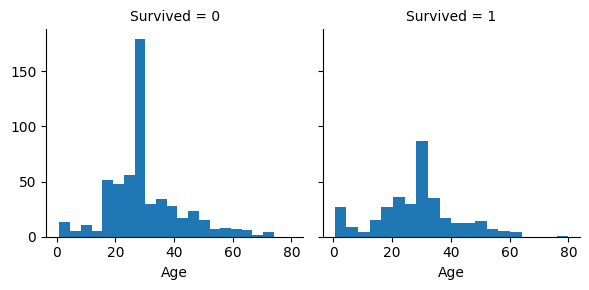

In [ ]:
age=sns.FacetGrid(df,col='Survived')
age.map(plt.hist,'Age',bins=20)

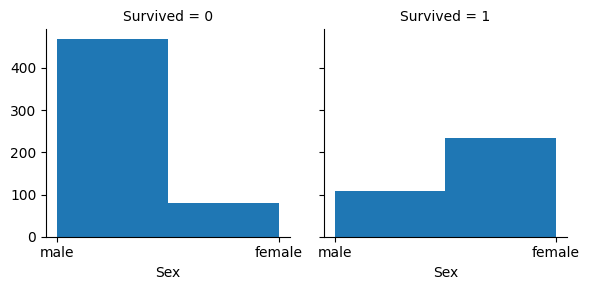

In [ ]:
gender=sns.FacetGrid(df,col='Survived')
gender.map(plt.hist,'Sex',bins=2)

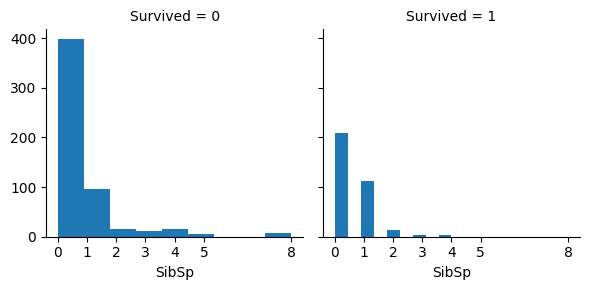

In [ ]:
sibsp=sns.FacetGrid(df,col='Survived')
plt.xticks(df['SibSp'].value_counts().index)
sibsp.map(plt.hist,'SibSp',bins=9)

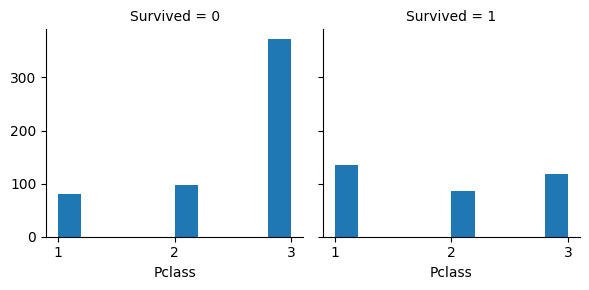

In [ ]:
pclass=sns.FacetGrid(df,col='Survived')
plt.xticks([1,2,3])
pclass.map(plt.hist,'Pclass')

In [ ]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.25,S
1,1,1,0,38.00,1,0,71.28,C
2,1,3,0,26.00,0,0,7.92,S
3,1,1,0,35.00,1,0,53.10,S
4,0,3,1,35.00,0,0,8.05,S


In [ ]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.25,1
1,1,1,0,38.00,1,0,71.28,2
2,1,3,0,26.00,0,0,7.92,1
3,1,1,0,35.00,1,0,53.10,1
4,0,3,1,35.00,0,0,8.05,1


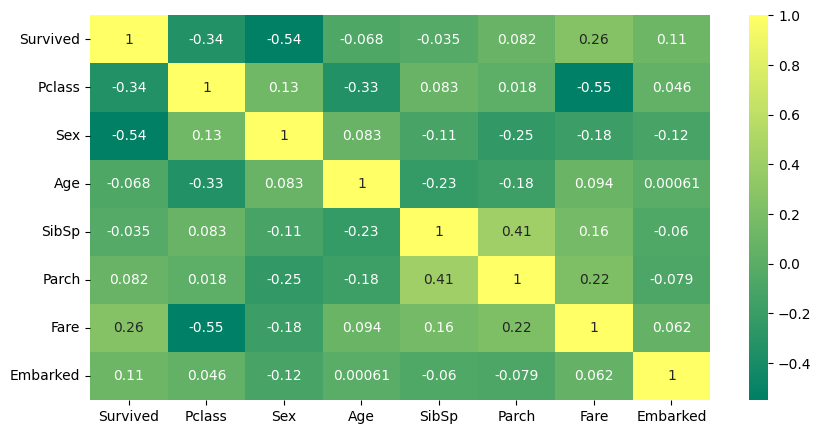

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='summer')
plt.show()


In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)

### Logistic Regression

In [ ]:
lg=LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
lg.score(X_train,y_train)

0.8019662921348315

In [ ]:
y_predlg=lg.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predlg))

0.7932960893854749


[[89 16]
 [21 53]]


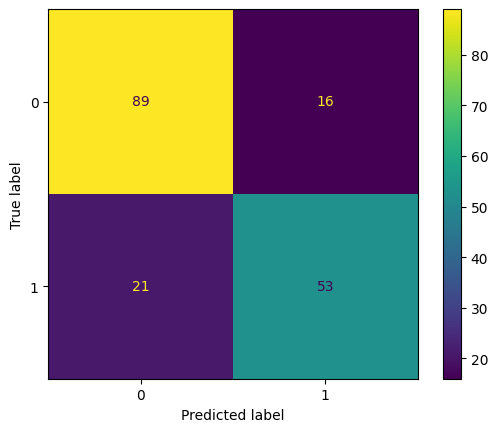

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_predlg)
print(confusion_matrix(y_test, y_predlg))

In [ ]:
print(classification_report(y_test, y_predlg))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### Decision Tree

In [ ]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
Dt.score(X_train,y_train)

0.973314606741573

In [ ]:
y_preddt=Dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_preddt))

0.7932960893854749


[[87 18]
 [19 55]]


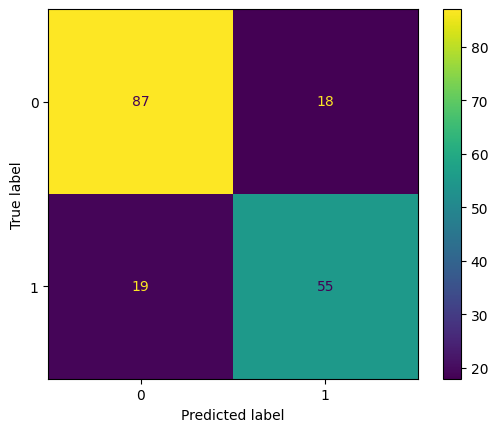

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preddt)
print(confusion_matrix(y_test, y_preddt))

In [ ]:
print(classification_report(y_test, y_preddt))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



### Random Forest Classifier

In [ ]:
Rf=RandomForestClassifier(n_estimators=1000)
Rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
Rf.score(X_train,y_train)

0.973314606741573

In [ ]:
y_predrf=Rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predrf))

0.8100558659217877


[[90 15]
 [19 55]]


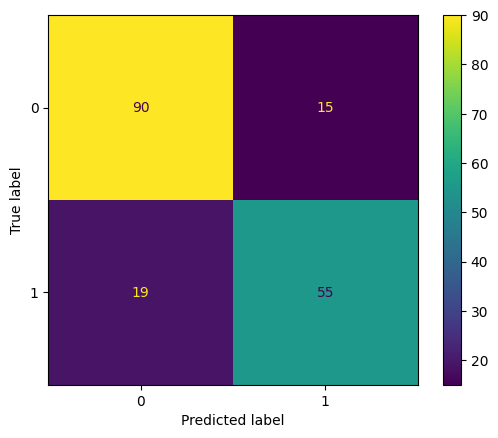

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predrf)
print(confusion_matrix(y_test, y_predrf))

In [ ]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_train,y_train)

0.8581460674157303

In [ ]:
y_predknn=knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predknn))

0.8044692737430168


[[90 15]
 [20 54]]


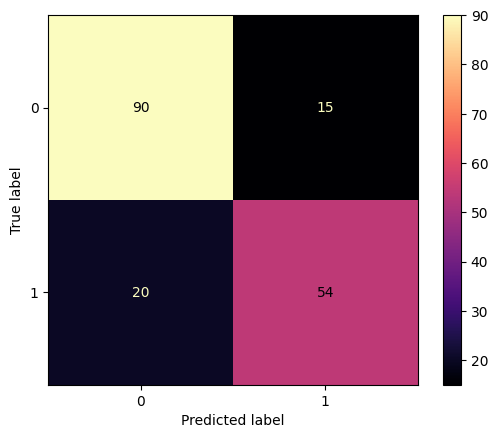

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predknn,cmap="magma")
print(confusion_matrix(y_test, y_predknn))

### SVC

In [ ]:
svm = SVC(kernel="rbf", C=1.0)
svm.fit(X_train, y_train)

SVC()

In [ ]:
svm.score(X_train, y_train)

0.8160112359550562

In [ ]:
y_presvm=svm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_presvm))

0.7932960893854749


[[95 10]
 [27 47]]


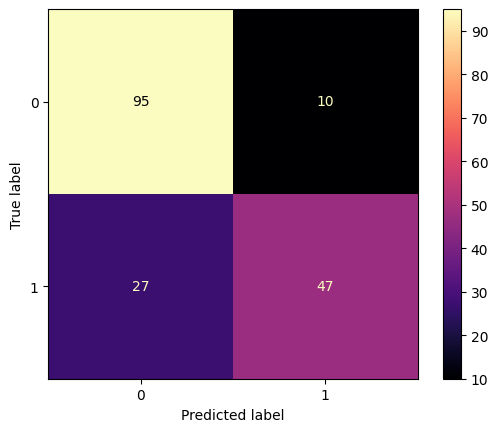

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_presvm,cmap="magma")
print(confusion_matrix(y_test, y_presvm))

### Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
gnb.score(X_train, y_train)

0.8019662921348315

In [ ]:
y_pregnb=svm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pregnb))

0.7932960893854749


[[95 10]
 [27 47]]


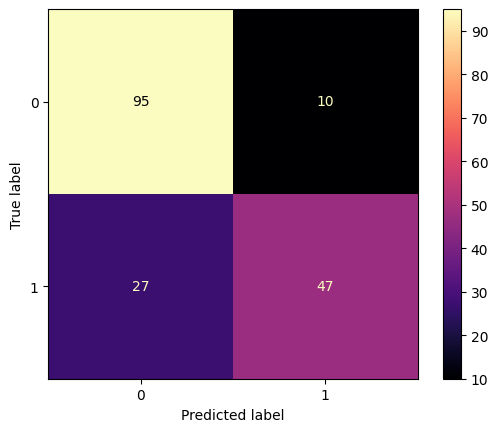

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pregnb,cmap="magma")
print(confusion_matrix(y_test, y_pregnb))

### XG Boost

In [ ]:
xg=xgb.XGBClassifier(objective="binary:logistic",random_state=42,n_estimators=1000, learning_rate=0.001, max_depth=7)
xg.fit(X_train, y_train,early_stopping_rounds=100, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68007
[1]	validation_0-logloss:0.67957
[2]	validation_0-logloss:0.67906
[3]	validation_0-logloss:0.67855
[4]	validation_0-logloss:0.67805
[5]	validation_0-logloss:0.67754
[6]	validation_0-logloss:0.67704
[7]	validation_0-logloss:0.67654
[8]	validation_0-logloss:0.67604
[9]	validation_0-logloss:0.67554
[10]	validation_0-logloss:0.67504
[11]	validation_0-logloss:0.67454
[12]	validation_0-logloss:0.67405
[13]	validation_0-logloss:0.67355
[14]	validation_0-logloss:0.67306
[15]	validation_0-logloss:0.67256
[16]	validation_0-logloss:0.67207
[17]	validation_0-logloss:0.67158
[18]	validation_0-logloss:0.67109
[19]	validation_0-logloss:0.67060
[20]	validation_0-logloss:0.67011
[21]	validation_0-logloss:0.66963
[22]	validation_0-logloss:0.66914
[23]	validation_0-logloss:0.66866
[24]	validation_0-logloss:0.66817
[25]	validation_0-logloss:0.66769
[26]	validation_0-logloss:0.66721
[27]	validation_0-logloss:0.66673
[28]	validation_0-logloss:0.66625
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
xg.score(X_train, y_train)

0.8735955056179775

In [ ]:
y_predxg=xg.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predxg))

0.8324022346368715


[[98  7]
 [23 51]]


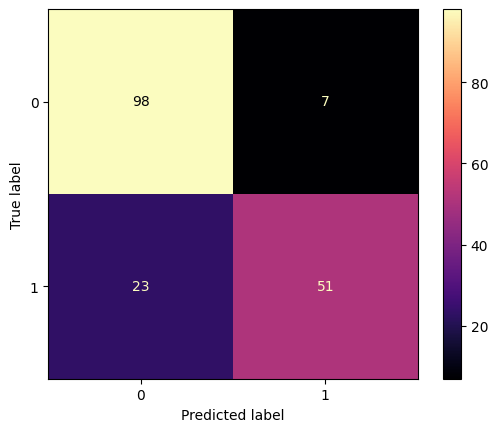

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predxg,cmap="magma")
print(confusion_matrix(y_test, y_predxg))

### Light Gradient Boosting

In [ ]:
lgbm = LGBMClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.01, n_estimators=1000, random_state=42)

In [ ]:
print(lgbm.score(X_train, y_train))

0.9424157303370787


In [ ]:
y_predlbgm=lgbm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_predlbgm))

0.8379888268156425


[[91 14]
 [15 59]]


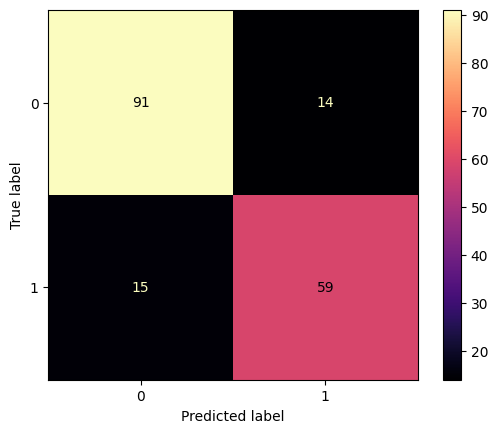

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predlbgm,cmap="magma")
print(confusion_matrix(y_test, y_predlbgm))

### Voting Classifier

In [ ]:
estimator = []
estimator.append(('LR', LogisticRegression()))
estimator.append(('RF', RandomForestClassifier(n_estimators=1000)))
estimator.append(('LGBM', LGBMClassifier(n_estimators=1000, learning_rate=0.01, random_state=42)))

vot = VotingClassifier(estimators=estimator, voting='hard')

In [ ]:
vot.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('RF', RandomForestClassifier(n_estimators=1000)),
                             ('LGBM',
                              LGBMClassifier(learning_rate=0.01,
                                             n_estimators=1000,
                                             random_state=42))])

In [ ]:
print(vot.score(X_train, y_train))

0.9466292134831461


In [ ]:
print(vot.score(X_test, y_test))

0.8268156424581006


### All Models

In [ ]:
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 17.53it/s]

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
